# **1) Запрограммировать собственную реализацию классического градиентного спуска**

In [2]:
!pip install pygmo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 46.2 MB/s eta 0:00:00


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import sympy as sp
import random
import pygmo as pg
import pandas as pd
from tabulate import tabulate

In [ ]:
# Градиентный спуск
def gradient_descent(gradient_func, initial_point, learning_rate, iterations):
    current_point = initial_point
    trajectory = [current_point]

    for i in range(iterations):
        gradient = gradient_func(current_point)
        current_point = current_point - learning_rate * gradient
        trajectory.append(current_point)

    return np.array(trajectory)

# **2) Выбрать тестовые функции оптимизации (2 шт)**

In [ ]:
# Функции и их градиенты
def quadratic_function(x):
    return x ** 2

def quadratic_gradient(x):
    return x * 2

def rosenbrock_function(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def rosenbrock_gradient(x, y):
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return np.array([dx, dy])

# **3) Запрограммировать пайплайн тестирования алгоритма оптимизации**

*   Визуализации функции и точки оптимума
*   Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков
*   Визуализации точки найденного решения (можно добавить анимацию на плюс балл)


In [ ]:
def test_gradient_descent(gradient, initial_point, learning_rate, iterations):
    trajectory = gradient_descent(gradient, initial_point, learning_rate, iterations)
    optimal_solution = trajectory[-1]
    error = np.linalg.norm(optimal_solution - np.array([1, 1]))
    return trajectory, optimal_solution, error

In [ ]:
# Визуализация на двумерном графике
def visualize_2d(trajectory, function, x_range):
    x = np.linspace(x_range[0], x_range[1], 100)
    y = function(x)
    func_trajectory = function(trajectory)
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label='Function')
    plt.plot(trajectory, func_trajectory, 'ro-', label='Trajectory')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Optimization Function and Gradient Descent Trajectory')
    plt.legend()
    plt.grid(True)
    #def update(frame):  #анимация траектории градиентного спуска, но не работает в колабе
        #line.set_data(trajectory[:frame], function(np.array(trajectory[:frame])))
        #return line,

    #anim = FuncAnimation(fig, update, frames=len(trajectory), interval=100, blit=True)
    plt.show()

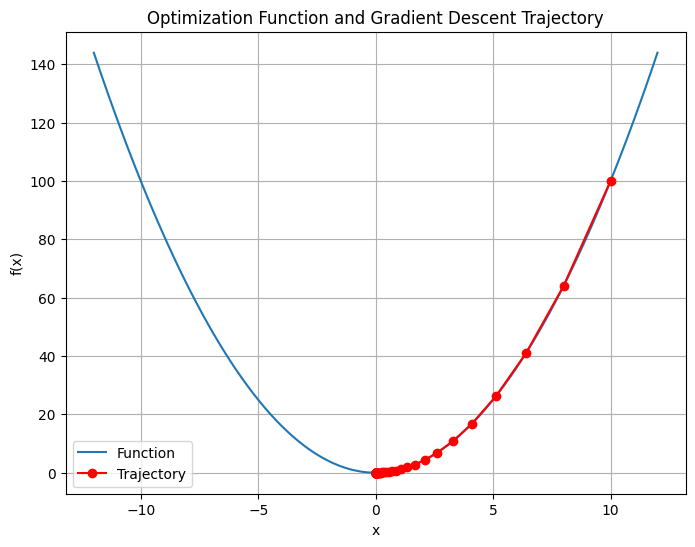

Optimal solution for quadratic function: 2.0370359763344878e-09
Error for quadratic function: 1.414213559492291


In [ ]:
# Тестирование квадратичной функции
initial_point_quad = 10
learning_rate_quad = 0.1
iterations_quad = 100

trajectory_quad, optimal_solution_quad, error_quad = test_gradient_descent(quadratic_gradient,
                                                                           initial_point_quad,
                                                                           learning_rate_quad,
                                                                           iterations_quad)

visualize_2d(trajectory_quad, quadratic_function, [-12, 12])
print(f"Optimal solution for quadratic function: {optimal_solution_quad}")
print(f"Error for quadratic function: {error_quad}")

In [ ]:
# Визуализация на трехмерном графике
def visualize_3d(trajectory, function, x_range, y_range):
  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')

  x = np.linspace(x_range[0], x_range[1], 100)
  y = np.linspace(y_range[0], y_range[1], 100)
  x, y = np.meshgrid(x, y)
  z = function(x, y)

  ax.plot_surface(x, y, z, cmap='viridis', alpha=0.5)
  ax.plot(trajectory[:, 0], trajectory[:, 1], function(trajectory[:, 0], trajectory[:, 1]), marker='o', color='r', label='Trajectory')

  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('f(x, y)')
  ax.set_title('Optimization Function and Gradient Descent Trajectory')
  ax.legend()
  plt.show()

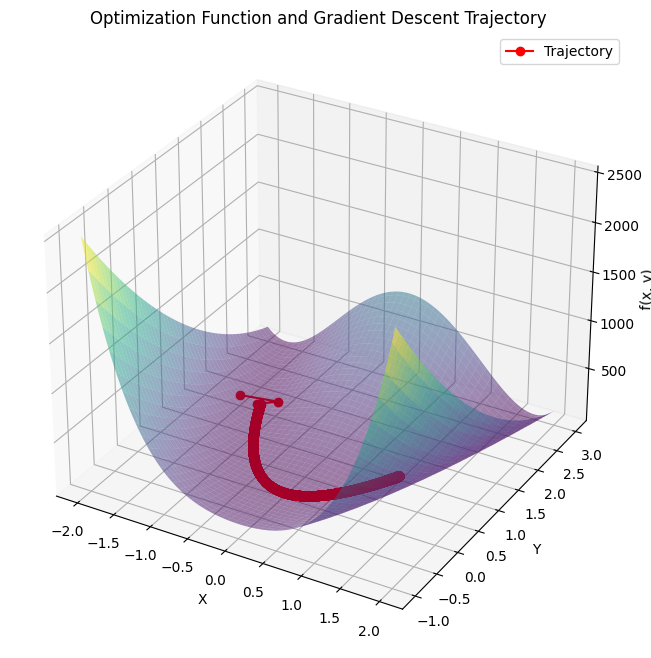

Optimal solution for Rosenbrock function: [0.99133699 0.98271418]
Error for Rosenbrock function: 0.019335128883801785


In [ ]:
# Тестирование функции Розенброка и визуализация траектории оптимизации
initial_point_rosenbrock = np.array([-1.5, 1.5])
learning_rate_rosenbrock = 0.001
iterations_rosenbrock = 10000

trajectory_rosenbrock, optimal_solution_rosenbrock, error_rosenbrock = test_gradient_descent(lambda x: rosenbrock_gradient(x[0], x[1]),
                                                                                             initial_point_rosenbrock,
                                                                                             learning_rate_rosenbrock,
                                                                                             iterations_rosenbrock)

visualize_3d(trajectory_rosenbrock, rosenbrock_function, [-2, 2], [-1, 3])
print(f"Optimal solution for Rosenbrock function: {optimal_solution_rosenbrock}")
print(f"Error for Rosenbrock function: {error_rosenbrock}")

# **4) Запрограммировать метод вычисления градиента**


*   Передача функции градиента от пользователя
*   Символьное вычисление градиента (например с помощью sympy) (на доп балл)
*   Численная аппроксимация градиента (на доп балл)


In [ ]:
# 1) Пользовательский метод вычисления градиента
def user_gradient(x, y):
  dx = -2 * (1 - x) - 400 * x * (y - x**2)
  dy = 200 * (y - x**2)
  return np.array([dx, dy])

In [ ]:
# 2) Символьное вычисление градиента с помощью SymPy
def symbolic_gradient(x, y):
    x_sym, y_sym = sp.symbols('x y')
    rosenbrock = (1 - x_sym)**2 + 100 * (y_sym - x_sym**2)**2
    dx = sp.diff(rosenbrock, x_sym).evalf(subs={x_sym: x, y_sym: y})
    dy = sp.diff(rosenbrock, y_sym).evalf(subs={x_sym: x, y_sym: y})
    return np.array([float(dx), float(dy)])

In [ ]:
# 3) Численная аппроксимация градиента
def numerical_gradient(x, y):
  epsilon = 1e-5
  f = rosenbrock_function
  dx = (f(x + epsilon, y) - f(x - epsilon, y)) / (2 * epsilon)
  dy = (f(x, y + epsilon) - f(x, y - epsilon)) / (2 * epsilon)
  return np.array([dx, dy])

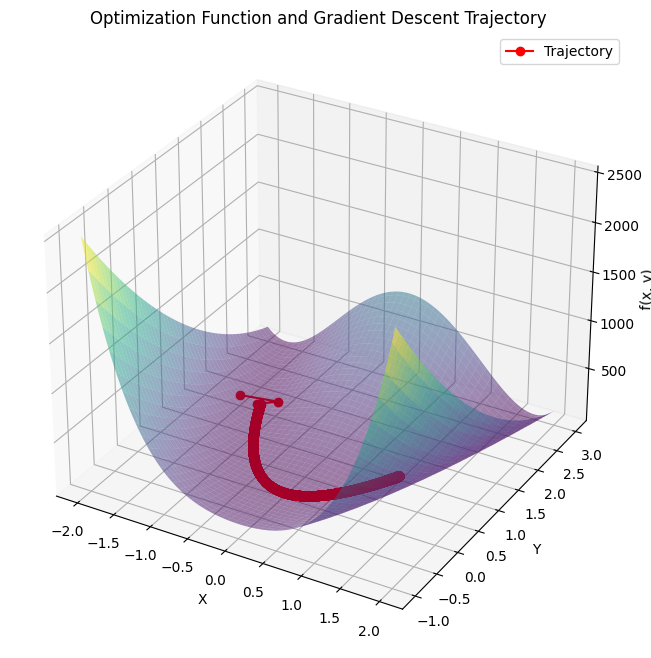

Optimal solution for Rosenbrock function: [0.99133699 0.98271418]
Error for Rosenbrock function: 0.019335128883801785


In [ ]:
# Пользовательский метод вычисления градиента
initial_point_rosenbrock = np.array([-1.5, 1.5])
learning_rate_rosenbrock = 0.001
iterations_rosenbrock = 10000

trajectory_rosenbrock, optimal_solution_rosenbrock, error_rosenbrock = test_gradient_descent(lambda x: user_gradient(x[0], x[1]),
                                                                                             initial_point_rosenbrock,
                                                                                             learning_rate_rosenbrock,
                                                                                             iterations_rosenbrock)

visualize_3d(trajectory_rosenbrock, rosenbrock_function, [-2, 2], [-1, 3])
print(f"Optimal solution for Rosenbrock function: {optimal_solution_rosenbrock}")
print(f"Error for Rosenbrock function: {error_rosenbrock}")

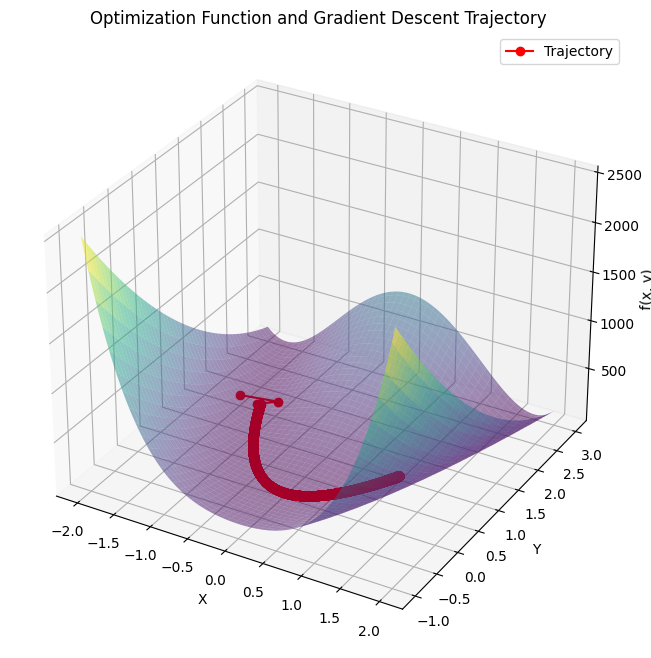

Optimal solution for Rosenbrock function: [0.99133699 0.98271418]
Error for Rosenbrock function: 0.019335128883802778


In [ ]:
# Символьное вычисление градиента
initial_point_rosenbrock = np.array([-1.5, 1.5])
learning_rate_rosenbrock = 0.001
iterations_rosenbrock = 10000

trajectory_rosenbrock, optimal_solution_rosenbrock, error_rosenbrock = test_gradient_descent(lambda x: symbolic_gradient(x[0], x[1]),
                                                                                             initial_point_rosenbrock,
                                                                                             learning_rate_rosenbrock,
                                                                                             iterations_rosenbrock)

visualize_3d(trajectory_rosenbrock, rosenbrock_function, [-2, 2], [-1, 3])
print(f"Optimal solution for Rosenbrock function: {optimal_solution_rosenbrock}")
print(f"Error for Rosenbrock function: {error_rosenbrock}")

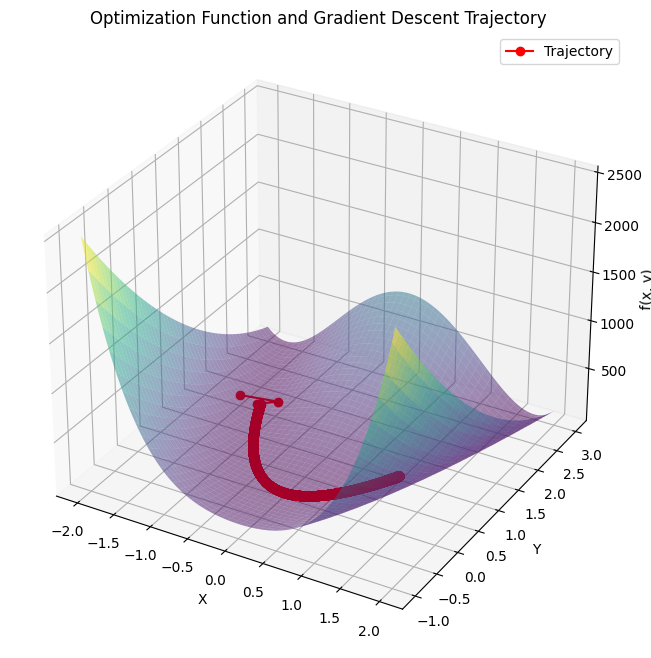

Optimal solution for Rosenbrock function: [0.99133697 0.98271415]
Error for Rosenbrock function: 0.019335169411649308


In [ ]:
# Численная аппроксимация градиента
initial_point_rosenbrock = np.array([-1.5, 1.5])
learning_rate_rosenbrock = 0.001
iterations_rosenbrock = 10000

trajectory_rosenbrock, optimal_solution_rosenbrock, error_rosenbrock = test_gradient_descent(lambda x: numerical_gradient(x[0], x[1]),
                                                                                             initial_point_rosenbrock,
                                                                                             learning_rate_rosenbrock,
                                                                                             iterations_rosenbrock)

visualize_3d(trajectory_rosenbrock, rosenbrock_function, [-2, 2], [-1, 3])
print(f"Optimal solution for Rosenbrock function: {optimal_solution_rosenbrock}")
print(f"Error for Rosenbrock function: {error_rosenbrock}")

# **5) Запрограммировать одну моментную модификацию и протестировать ее**

In [ ]:
def gradient_descent_with_momentum(gradient_func, initial_point, learning_rate, momentum, iterations):
    current_point = initial_point
    trajectory = [current_point]
    velocity = np.zeros_like(initial_point)

    for i in range(iterations):
        gradient = gradient_func(current_point)
        # gradient = gradient_func(current_point + momentum * velocity)
        velocity = momentum * velocity - learning_rate * gradient
        current_point = current_point + velocity
        trajectory.append(current_point)

    return np.array(trajectory)

In [ ]:
def test_gradient_descent_with_momentum(gradient, initial_point, learning_rate, momentum, iterations):
    trajectory = gradient_descent_with_momentum(gradient, initial_point, learning_rate, momentum, iterations)
    optimal_solution = trajectory[-1]
    error = np.linalg.norm(optimal_solution - np.array([1, 1]))
    return trajectory, optimal_solution, error

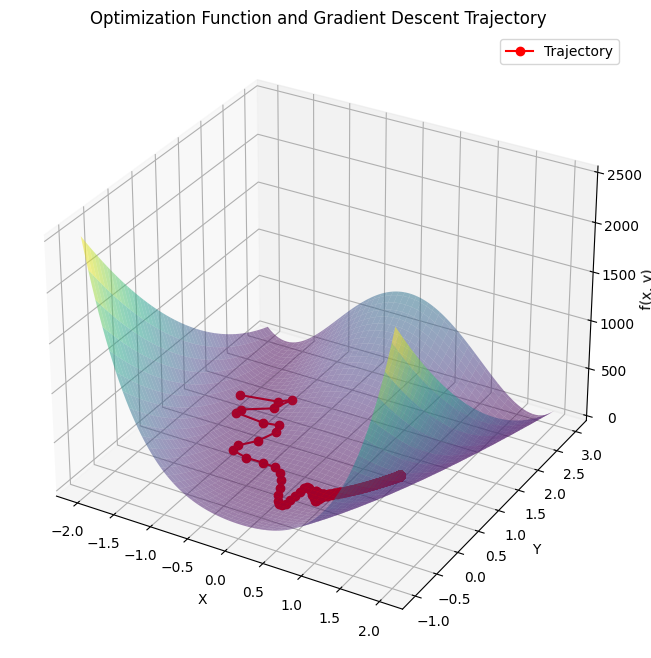

Optimal solution using Momentum: [1. 1.]
Error using Momentum: 2.1355566272775288e-15


In [ ]:
# Тест метода Momentum
initial_point_rosenbrock = np.array([-1.5, 1.5])
learning_rate_rosenbrock = 0.001
momentum = 0.9
iterations_rosenbrock = 10000

trajectory_momentum, optimal_solution_momentum, error_momentum = test_gradient_descent_with_momentum(lambda x: rosenbrock_gradient(x[0], x[1]),
                                                                                                     initial_point_rosenbrock,
                                                                                                     learning_rate_rosenbrock,
                                                                                                     momentum,
                                                                                                     iterations_rosenbrock)

visualize_3d(trajectory_momentum, rosenbrock_function, [-2, 2], [-1, 3])
print(f"Optimal solution using Momentum: {optimal_solution_momentum}")
print(f"Error using Momentum: {error_momentum}")

# **6) Запрограммировать одну адаптивную модификацию и протестировать ее**

In [ ]:
def adagrad(gradient_func, initial_point, learning_rate, epsilon, iterations):
    current_point = initial_point
    trajectory = [current_point]
    accumulated_gradients = np.zeros_like(initial_point)

    for i in range(iterations):
        gradient = gradient_func(current_point)
        #accumulated_gradients = 0.9 * accumulated_gradients + 0.1 * gradient ** 2
        accumulated_gradients = accumulated_gradients + gradient ** 2
        adjusted_gradient = gradient / (np.sqrt(accumulated_gradients) + epsilon)
        current_point = current_point - learning_rate * adjusted_gradient
        trajectory.append(current_point)

    return np.array(trajectory)

In [ ]:
def test_adagrad(gradient, initial_point, learning_rate, epsilon, iterations):
    trajectory = adagrad(gradient, initial_point, learning_rate, epsilon, iterations)
    optimal_solution = trajectory[-1]
    error = np.linalg.norm(optimal_solution - np.array([1, 1]))
    return trajectory, optimal_solution, error

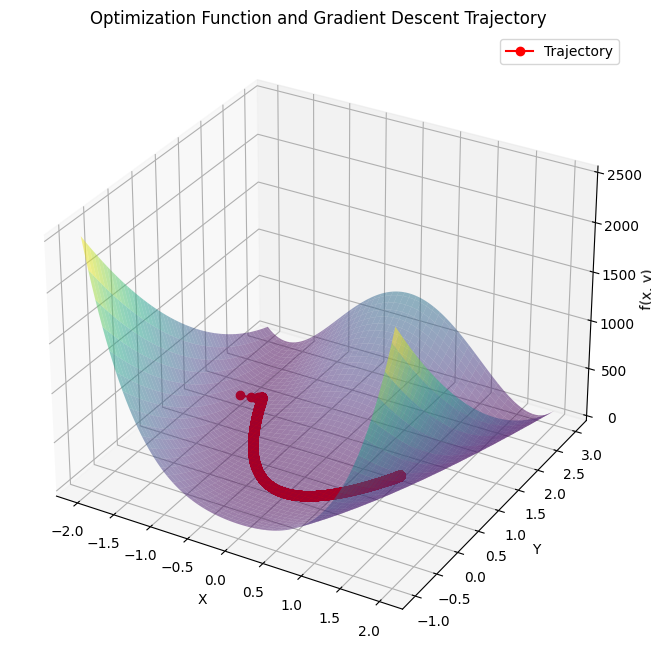

Optimal solution using Adagrad: [0.99999989 0.99999979]
Error using Adagrad: 2.399040592139812e-07


In [ ]:
# Тест метода Adagrad
initial_point_rosenbrock = np.array([-1.5, 1.5])
learning_rate_adagrad = 0.1
#learning_rate_adagrad = 3e-4
epsilon = 1e-8
iterations_adagrad = 100000

trajectory_adagrad, optimal_solution_adagrad, error_adagrad = test_adagrad(lambda x: rosenbrock_gradient(x[0], x[1]),
                                                                           initial_point_rosenbrock,
                                                                           learning_rate_adagrad,
                                                                           epsilon,
                                                                           iterations_adagrad)

visualize_3d(trajectory_adagrad, rosenbrock_function, [-2, 2], [-1, 3])
print(f"Optimal solution using Adagrad: {optimal_solution_adagrad}")
print(f"Error using Adagrad: {error_adagrad}")

# **7) Запрограммировать метод эфолюции темпа обучения или метод выбора начального приближения**

In [ ]:
# Метод выбора начального приближения
def random_initialization(bounds):
    for b in bounds:
        min=b[0]
        max=b[1]
    return np.array([random.uniform(min, max), random.uniform(min, max)])

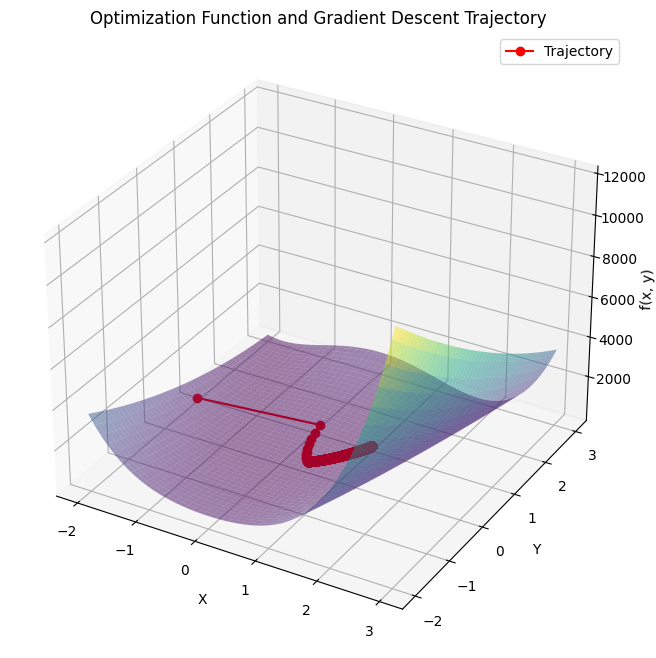

Optimal solution for Rosenbrock function: [0.99500034 0.99000561]
Error for Rosenbrock function: 0.01117517248598689


In [ ]:
bounds = [(-2, 3), (-2, 3)]
initial_point_random = random_initialization(bounds)

learning_rate_rosenbrock = 0.001
iterations_rosenbrock = 10000

trajectory_rosenbrock, optimal_solution_rosenbrock, error_rosenbrock = test_gradient_descent(lambda x: rosenbrock_gradient(x[0], x[1]),
                                                                                             initial_point_random,
                                                                                             learning_rate_rosenbrock,
                                                                                             iterations_rosenbrock)

visualize_3d(trajectory_rosenbrock, rosenbrock_function, [-2, 3], [-2, 3])
print(f"Optimal solution for Rosenbrock function: {optimal_solution_rosenbrock}")
print(f"Error for Rosenbrock function: {error_rosenbrock}")

# **8) В Pygmo запрогроммировать две своих тестовых функции и найти их оптимум 3 разными алгоритмами доступными в библиотеке и получить таблицу сравнения**

In [16]:
# Определение тестовых функций
class SphereFunction:
    def fitness(self, x):
        return [sum(x**2)]

    def get_bounds(self):
        return ([-10, -10], [10, 10])

class RosenbrockFunction:
    def fitness(self, x):
        return [(1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2]

    def get_bounds(self):
        return ([-10, -10], [10, 10])

In [114]:
def optimize_and_print(algorithms, problems):
    for problem in problems:
        table = [["Function", problem.__class__.__name__]]
        for algorithm in algorithms:
            prob = pg.problem(problem)
            algo = pg.algorithm(algorithm(gen=100))

            pop = pg.population(prob, size=10)
            result = algo.evolve(pop)

            best_solution = result.champion_x
            function_value = problem.fitness(best_solution)[0]

            row = [
                ["Algorithm", algorithm.__name__],
                ["Best Solution", best_solution],
                ["Function Value", function_value]
            ]

            table.extend(row)

        print(tabulate(table, tablefmt="grid"))
        print()

In [115]:
problems = [SphereFunction(), RosenbrockFunction()]
algorithms = [pg.de, pg.pso, pg.sga]

optimize_and_print(algorithms, problems)

+----------------+---------------------------------+
| Function       | SphereFunction                  |
+----------------+---------------------------------+
| Algorithm      | de                              |
+----------------+---------------------------------+
| Best Solution  | [-0.00010124 -0.00013381]       |
+----------------+---------------------------------+
| Function Value | 2.8153669174873716e-08          |
+----------------+---------------------------------+
| Algorithm      | pso                             |
+----------------+---------------------------------+
| Best Solution  | [5.54925298e-05 1.81734696e-04] |
+----------------+---------------------------------+
| Function Value | 3.610692043167358e-08           |
+----------------+---------------------------------+
| Algorithm      | sga                             |
+----------------+---------------------------------+
| Best Solution  | [ 0.44398399 -0.09597074]       |
+----------------+----------------------------